In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NwOq8YGFjNY57lbPrwBo")
project = rf.workspace("ahsan-h6w1d").project("fire-and-smoke-segmentation-srzml")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 9.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fire-and-Smoke-Segmentation-1 in yolov8:: 100%|██████████| 414/414 [00:00<00:00, 6016.84it/s]


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [5]:
from ultralytics import YOLO
import torch

# 1. Load the YOLOv8-seg model (using the nano version for efficiency, but you can use 'yolov8m-seg.pt' or 'yolov8l-seg.pt' for better performance)
model = YOLO('yolov8n-seg.pt')  # Pre-trained YOLOv8 segmentation model

# 2. Define the path to your dataset configuration file (data.yaml)
data_path = '/content/Fire-and-Smoke-Segmentation-1/data.yaml'  # Replace with the actual path to your data.yaml file

# 3. Train the model
results = model.train(
    data=data_path,  # Path to your dataset configuration file
    epochs=100,      # Number of training epochs (adjust based on your needs)
    imgsz=640,       # Image size (adjust based on your dataset or hardware)
    batch=16,        # Batch size (adjust based on GPU memory)
    project='runs/train',  # Directory to save training results
    name='fire_smoke_seg',  # Name of the experiment
    device=0,        # Use GPU 0 (set to 'cpu' if no GPU available)
    optimizer='Adam',  # Optimizer (default is SGD, but Adam can work well for segmentation)
    lr0=0.001,       # Initial learning rate
    patience=50,     # Early stopping patience
    exist_ok=True    # Allow overwriting existing runs
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.74M/6.74M [00:00<00:00, 114MB/s]


Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/Fire-and-Smoke-Segmentation-1/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=runs/train, name=fire_smoke_seg, exist_ok=True, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

100%|██████████| 755k/755k [00:00<00:00, 20.0MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 112MB/s]


AMP: checks passed ✅


train: Scanning /content/Fire-and-Smoke-Segmentation-1/train/labels... 141 images, 0 backgrounds, 0 corrupt: 100%|██████████| 141/141 [00:00<00:00, 1266.39it/s]

train: New cache created: /content/Fire-and-Smoke-Segmentation-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Fire-and-Smoke-Segmentation-1/valid/labels... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<00:00, 305.30it/s]

val: New cache created: /content/Fire-and-Smoke-Segmentation-1/valid/labels.cache


Plotting labels to runs/train/fire_smoke_seg/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/train/fire_smoke_seg
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.65G      1.462      3.872      3.324       1.52         61        640: 100%|██████████| 9/9 [00:08<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         40         97    0.00581      0.696     0.0974     0.0488      0.002      0.223    0.00592    0.00141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.57G      1.417      3.442      2.815      1.494         56        640: 100%|██████████| 9/9 [00:02<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]

                   all         40         97     0.0055      0.627     0.0751     0.0356    0.00222      0.214    0.00214   0.000496



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.62G      1.384      3.106      2.219      1.422         83        640: 100%|██████████| 9/9 [00:03<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         40         97    0.00792      0.579      0.153     0.0823    0.00213       0.18    0.00322   0.000704



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.63G      1.422       2.98      1.989      1.483         61        640: 100%|██████████| 9/9 [00:03<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         40         97          1     0.0394      0.209      0.135    0.00176      0.146    0.00137   0.000326



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.63G      1.429      2.824       1.85      1.464         39        640: 100%|██████████| 9/9 [00:02<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         40         97       0.43      0.142      0.214      0.117     0.0247    0.00862     0.0375    0.00957



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.64G      1.459      2.872      1.786      1.463         60        640: 100%|██████████| 9/9 [00:03<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         40         97      0.794      0.297      0.448      0.239      0.255      0.138      0.134     0.0402



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100       2.6G      1.333      2.652      1.672      1.429         51        640: 100%|██████████| 9/9 [00:02<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]

                   all         40         97      0.511      0.486      0.461      0.241      0.406      0.288      0.227     0.0988



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.63G       1.39      2.623      1.609      1.463         63        640: 100%|██████████| 9/9 [00:02<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         40         97      0.587      0.348      0.384       0.18      0.339      0.211      0.204      0.081



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.62G      1.376      2.546      1.556      1.448         57        640: 100%|██████████| 9/9 [00:03<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         40         97      0.497      0.507      0.439      0.212      0.198      0.283       0.13     0.0381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.56G      1.349      2.655       1.63      1.397         46        640: 100%|██████████| 9/9 [00:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]

                   all         40         97      0.403      0.535      0.421      0.194      0.222      0.292      0.166     0.0437



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100       2.6G      1.336      2.646      1.516      1.397         67        640: 100%|██████████| 9/9 [00:02<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all         40         97       0.43      0.569      0.473      0.226       0.38      0.398       0.36      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.63G      1.285      2.355      1.428      1.367         59        640: 100%|██████████| 9/9 [00:03<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         40         97      0.602      0.544       0.58      0.299      0.609      0.513      0.564      0.237



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.69G      1.292      2.482      1.466      1.367         63        640: 100%|██████████| 9/9 [00:02<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.62it/s]

                   all         40         97      0.554      0.549      0.554      0.298      0.491      0.559      0.525      0.246



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.62G       1.37      2.518       1.52      1.419         45        640: 100%|██████████| 9/9 [00:02<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]

                   all         40         97      0.552      0.509      0.524      0.318      0.537      0.532      0.522       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.67G      1.333      2.653      1.513      1.402         44        640: 100%|██████████| 9/9 [00:03<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40         97      0.594      0.567      0.578      0.342      0.571      0.559      0.536      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.62G       1.28      2.415      1.396       1.37         60        640: 100%|██████████| 9/9 [00:02<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all         40         97      0.479       0.55      0.498      0.295      0.552       0.52       0.51      0.281



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.62G       1.31      2.332      1.341      1.385         50        640: 100%|██████████| 9/9 [00:02<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all         40         97      0.554      0.533       0.54      0.336      0.561      0.533      0.549       0.33



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.66G      1.285      2.362      1.379      1.373         61        640: 100%|██████████| 9/9 [00:03<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         40         97      0.662      0.516      0.574      0.361      0.662      0.516      0.565      0.349



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.56G      1.251       2.33      1.348      1.367         73        640: 100%|██████████| 9/9 [00:02<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

                   all         40         97      0.688      0.605      0.629      0.399      0.728       0.55      0.623      0.374



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.61G       1.22      2.261      1.271      1.324         54        640: 100%|██████████| 9/9 [00:02<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]

                   all         40         97      0.567      0.639      0.617      0.374      0.794       0.52      0.611      0.345



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.67G       1.24      2.359      1.342      1.337         63        640: 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         40         97      0.745      0.567      0.656      0.395      0.652      0.589      0.624      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.65G      1.213      2.331      1.325       1.32         41        640: 100%|██████████| 9/9 [00:02<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all         40         97      0.644      0.627      0.628      0.396      0.617      0.597       0.62      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.59G      1.264      2.262      1.334      1.317         67        640: 100%|██████████| 9/9 [00:02<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         40         97      0.698      0.584      0.632      0.387      0.684      0.571      0.622      0.369



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.63G      1.139      2.183      1.206      1.277         56        640: 100%|██████████| 9/9 [00:03<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         40         97       0.66      0.512      0.601      0.377      0.691      0.525      0.596       0.37



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.64G      1.223      2.269      1.255       1.34         72        640: 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         40         97      0.705       0.58      0.633      0.382      0.693      0.576      0.603      0.347



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.65G      1.216      2.267      1.232      1.321         45        640: 100%|██████████| 9/9 [00:02<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all         40         97      0.708       0.58      0.631      0.392      0.677       0.55      0.583      0.335



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.64G      1.218      2.226       1.22       1.35         68        640: 100%|██████████| 9/9 [00:03<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]

                   all         40         97       0.71      0.593      0.646      0.403      0.667      0.623      0.636      0.368



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.58G      1.181      2.298      1.217      1.304         50        640: 100%|██████████| 9/9 [00:02<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]

                   all         40         97      0.756      0.579      0.661      0.389      0.719      0.553      0.634      0.338



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.63G      1.208       2.18      1.238      1.325         42        640: 100%|██████████| 9/9 [00:02<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]

                   all         40         97      0.712       0.65        0.7      0.408      0.659      0.615      0.634      0.357



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.59G      1.168      2.242      1.212      1.253         45        640: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         40         97      0.742      0.619      0.693      0.427      0.718      0.606      0.681      0.412



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.63G      1.134      2.127      1.151      1.288         38        640: 100%|██████████| 9/9 [00:02<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         40         97      0.778      0.625      0.699      0.423      0.788      0.634      0.699      0.412



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.68G      1.105      2.107       1.11      1.219         63        640: 100%|██████████| 9/9 [00:02<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]

                   all         40         97      0.728      0.618      0.704      0.389      0.643      0.687      0.689      0.374



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.66G      1.162      2.172      1.185      1.298         43        640: 100%|██████████| 9/9 [00:03<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         40         97      0.769      0.644      0.708      0.392       0.76       0.64      0.702      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.65G      1.174      2.196      1.181      1.303         52        640: 100%|██████████| 9/9 [00:02<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all         40         97       0.81      0.669      0.713      0.399      0.792      0.658        0.7      0.385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.67G      1.224      2.125      1.183      1.294         65        640: 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         40         97      0.778      0.662      0.689      0.411      0.806      0.674      0.717      0.386



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.67G      1.174      2.229      1.116       1.27         48        640: 100%|██████████| 9/9 [00:03<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         40         97      0.718      0.692      0.674      0.418      0.732      0.722      0.681      0.384



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.56G      1.152       2.24      1.181      1.273         52        640: 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.68it/s]

                   all         40         97      0.768      0.619      0.707      0.452      0.768      0.619      0.701      0.431



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.68G      1.156      2.198       1.17      1.276         42        640: 100%|██████████| 9/9 [00:02<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         40         97      0.818      0.627      0.687      0.432      0.807      0.623      0.675      0.419



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.59G      1.083      2.106      1.144      1.247         61        640: 100%|██████████| 9/9 [00:02<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         40         97      0.753      0.607      0.681      0.431      0.783      0.627      0.682      0.403



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.63G      1.126      2.116        1.1      1.281         42        640: 100%|██████████| 9/9 [00:02<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         40         97      0.587      0.593      0.587      0.372      0.671      0.594      0.592      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.58G      1.099      2.127      1.104      1.263         68        640: 100%|██████████| 9/9 [00:03<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]


                   all         40         97      0.643      0.602        0.6      0.355      0.629      0.597      0.605      0.337

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.62G      1.126      2.068      1.043      1.225         70        640: 100%|██████████| 9/9 [00:02<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         40         97      0.683      0.631      0.634      0.376      0.687      0.615      0.641      0.357



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.62G      1.123       2.14      1.092      1.277         61        640: 100%|██████████| 9/9 [00:02<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         40         97      0.646      0.649      0.644      0.386      0.644       0.63      0.649      0.372



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.62G      1.043      2.043      1.072      1.221         65        640: 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         40         97       0.59      0.704      0.647      0.412      0.683      0.661      0.693      0.399



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.62G          1      1.982          1      1.204         49        640: 100%|██████████| 9/9 [00:02<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]

                   all         40         97      0.761      0.589      0.698      0.429      0.779      0.583      0.689      0.408



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.63G       1.06      2.098       1.07      1.206         56        640: 100%|██████████| 9/9 [00:02<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]

                   all         40         97      0.802       0.58      0.698      0.434      0.812      0.589      0.693      0.404



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.65G      1.026      1.947     0.9522      1.208         45        640: 100%|██████████| 9/9 [00:03<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]


                   all         40         97      0.866      0.567      0.714      0.427      0.835      0.571      0.696      0.395

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.61G      1.094      2.061      1.023      1.237         59        640: 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all         40         97      0.634      0.623      0.669      0.425      0.781      0.559      0.658      0.397



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.65G      1.084      2.077      1.062      1.232         53        640: 100%|██████████| 9/9 [00:02<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         40         97      0.742      0.562       0.66      0.434      0.758      0.581      0.672      0.397



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.61G      1.045      2.011      1.013      1.197         56        640: 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         40         97      0.711      0.552      0.632      0.414      0.727       0.57      0.646      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.63G      1.034      1.977     0.9748       1.19         71        640: 100%|██████████| 9/9 [00:02<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         40         97      0.865      0.524      0.645      0.405      0.839      0.529      0.645      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.57G      1.029      1.999      1.024       1.21         48        640: 100%|██████████| 9/9 [00:02<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]

                   all         40         97      0.819      0.574      0.683      0.426      0.802       0.57      0.666        0.4



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.62G      1.109      2.068       1.06       1.25         48        640: 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         40         97      0.904      0.615      0.718      0.452      0.867      0.623      0.688       0.42



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100       2.6G     0.9966      1.941     0.9538      1.172         49        640: 100%|██████████| 9/9 [00:02<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all         40         97       0.87      0.619      0.728      0.469      0.807      0.649      0.715      0.439



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.62G      0.959      1.922     0.9401      1.172         70        640: 100%|██████████| 9/9 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         40         97      0.869      0.576      0.726      0.484       0.89      0.593      0.719      0.443



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.64G     0.9662      1.849     0.9115      1.178         78        640: 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         40         97      0.839      0.602      0.701       0.48      0.848       0.61      0.706      0.448



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.59G      1.019       2.05     0.9853      1.212         75        640: 100%|██████████| 9/9 [00:02<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         40         97      0.869      0.591      0.677      0.461      0.734      0.636      0.683      0.442



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100       2.6G     0.9908      1.882     0.9007      1.191         55        640: 100%|██████████| 9/9 [00:02<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         40         97      0.872      0.576      0.667       0.46      0.853      0.572      0.662      0.443



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.66G     0.9987      1.912     0.9526       1.19         40        640: 100%|██████████| 9/9 [00:03<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

                   all         40         97      0.851      0.601      0.678      0.476      0.837      0.597      0.665      0.454



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.63G     0.9889      1.844      0.899      1.164         51        640: 100%|██████████| 9/9 [00:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         40         97      0.789      0.636      0.686      0.464      0.779      0.632      0.666      0.438



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.61G     0.9774      2.004     0.9198      1.182         50        640: 100%|██████████| 9/9 [00:02<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         40         97      0.799      0.601      0.697      0.466      0.785      0.598      0.678      0.447



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.66G     0.9655      1.903     0.8653      1.151         48        640: 100%|██████████| 9/9 [00:03<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]

                   all         40         97      0.748      0.679      0.701      0.475       0.73      0.636      0.675      0.439



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.62G      0.962       1.83     0.8588       1.15         49        640: 100%|██████████| 9/9 [00:02<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all         40         97      0.759      0.627      0.703      0.474      0.679      0.671      0.676      0.444



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.67G      0.955      1.937     0.8496      1.156         63        640: 100%|██████████| 9/9 [00:02<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         40         97      0.842      0.629      0.719      0.483      0.786      0.632      0.685      0.452



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.58G     0.9755      1.895     0.8769      1.174         79        640: 100%|██████████| 9/9 [00:03<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         40         97      0.836      0.626      0.718      0.471      0.807      0.657      0.702      0.447



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.61G     0.9554      1.914     0.8574      1.179         51        640: 100%|██████████| 9/9 [00:02<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         40         97      0.783      0.619      0.705      0.466      0.836      0.615      0.701      0.448



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.74G     0.9637      1.868     0.8703      1.154         61        640: 100%|██████████| 9/9 [00:02<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         40         97      0.649      0.724      0.697      0.455      0.873      0.593      0.695      0.447



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100       2.6G      0.962      1.825     0.8448      1.167         62        640: 100%|██████████| 9/9 [00:03<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all         40         97      0.698      0.696       0.71      0.459      0.698      0.696      0.719      0.446



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.58G     0.9945      1.925     0.9021      1.177         47        640: 100%|██████████| 9/9 [00:02<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         40         97      0.755      0.694      0.703      0.458      0.755      0.694      0.732      0.437



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100       2.6G     0.9958      1.939     0.9347      1.202         66        640: 100%|██████████| 9/9 [00:02<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]

                   all         40         97      0.784        0.7      0.731      0.469      0.767      0.687      0.731      0.436



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.63G     0.9503      1.881     0.8578      1.138         53        640: 100%|██████████| 9/9 [00:03<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]

                   all         40         97      0.815      0.717       0.76       0.48      0.797      0.704      0.742      0.458



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.62G     0.9398      1.802     0.8322      1.156         53        640: 100%|██████████| 9/9 [00:02<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         40         97      0.802       0.73      0.748      0.496      0.794      0.726      0.749      0.471



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.59G     0.9636      1.897     0.8493      1.153         46        640: 100%|██████████| 9/9 [00:02<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all         40         97      0.839      0.678      0.737      0.487      0.829      0.673      0.732      0.466



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.65G     0.9428      1.864      0.845      1.151         47        640: 100%|██████████| 9/9 [00:03<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         40         97      0.831      0.665      0.726      0.489      0.819      0.662      0.738      0.463



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.66G     0.9038       1.78     0.7817      1.127         57        640: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all         40         97      0.825      0.649      0.735      0.483      0.814      0.645      0.738      0.462



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.61G     0.9146      1.836     0.8261      1.134         78        640: 100%|██████████| 9/9 [00:02<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]

                   all         40         97      0.805      0.656      0.731      0.479      0.791      0.653      0.723      0.455



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.67G     0.8593      1.723     0.7885      1.101         61        640: 100%|██████████| 9/9 [00:03<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         40         97       0.84      0.662      0.726      0.479       0.81      0.653      0.726      0.454



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.62G     0.8921      1.773     0.7765      1.112         40        640: 100%|██████████| 9/9 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]

                   all         40         97      0.837      0.653      0.736      0.487      0.823      0.657      0.725      0.457



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.61G     0.8847       1.82     0.7845      1.121         65        640: 100%|██████████| 9/9 [00:02<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         40         97      0.834      0.662      0.733      0.483       0.82      0.639      0.704      0.451



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.58G     0.8454      1.739     0.8226      1.122         60        640: 100%|██████████| 9/9 [00:03<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         40         97      0.774      0.649       0.71      0.472      0.783      0.657       0.73      0.456



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.63G     0.8637      1.815     0.7972       1.11         47        640: 100%|██████████| 9/9 [00:02<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all         40         97      0.793      0.662      0.723      0.484      0.803       0.67      0.737      0.465



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.64G     0.8908      1.795     0.8494      1.123         67        640: 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         40         97      0.727      0.691      0.715      0.486      0.742      0.732      0.745      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.63G     0.8968       1.79     0.7854       1.12         64        640: 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]


                   all         40         97      0.878      0.632      0.731      0.492      0.902      0.642      0.754      0.461

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.58G      0.843      1.803     0.7765      1.085         55        640: 100%|██████████| 9/9 [00:02<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]

                   all         40         97      0.846      0.636      0.726      0.502      0.917      0.666      0.767      0.466



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.61G     0.9541      1.877      0.833      1.162         70        640: 100%|██████████| 9/9 [00:02<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


                   all         40         97      0.796      0.651      0.731      0.498       0.87       0.65      0.746      0.461

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.67G     0.8596      1.781     0.8006      1.095         59        640: 100%|██████████| 9/9 [00:03<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         40         97      0.885       0.61      0.722      0.493      0.906      0.628      0.731      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.64G     0.8389      1.737     0.7583      1.104         57        640: 100%|██████████| 9/9 [00:02<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]

                   all         40         97      0.919      0.597      0.713      0.486        0.9      0.593        0.7      0.446



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.67G     0.8566      1.722     0.7636      1.102         34        640: 100%|██████████| 9/9 [00:02<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         40         97      0.855       0.62      0.702      0.472      0.865      0.629      0.717       0.44



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.62G     0.8762      1.772     0.8023      1.093         54        640: 100%|██████████| 9/9 [00:03<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         40         97      0.838      0.615      0.696      0.455      0.838      0.623      0.705      0.424



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.56G     0.9069      1.841     0.7904      1.108         53        640: 100%|██████████| 9/9 [00:02<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         40         97      0.824      0.617      0.708      0.459      0.834      0.626      0.708      0.433


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.55G     0.8275      1.673     0.7514      1.091         30        640: 100%|██████████| 9/9 [00:05<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         40         97      0.849      0.617      0.723      0.466      0.835      0.613      0.714      0.437



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.59G     0.8095      1.616     0.7473      1.088         31        640: 100%|██████████| 9/9 [00:02<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         40         97      0.717      0.751      0.739      0.489      0.708      0.734      0.741      0.463



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.58G     0.8348      1.624     0.7404      1.128         37        640: 100%|██████████| 9/9 [00:02<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]

                   all         40         97      0.735      0.726      0.747      0.487      0.729      0.709      0.748      0.466



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.55G     0.8182      1.628     0.7232      1.104         29        640: 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]

                   all         40         97      0.729      0.726       0.74      0.482      0.881      0.648      0.737       0.47



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.54G     0.7926      1.585     0.6857      1.083         40        640: 100%|██████████| 9/9 [00:02<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         40         97      0.889       0.64      0.754      0.485        0.9      0.649      0.757       0.47



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.54G     0.8167      1.619     0.7365      1.125         23        640: 100%|██████████| 9/9 [00:02<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         40         97      0.877      0.635      0.753      0.481      0.888      0.643       0.75      0.472



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.56G     0.8279      1.678     0.7213      1.111         35        640: 100%|██████████| 9/9 [00:03<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         40         97       0.88      0.632      0.752      0.488      0.891       0.64      0.758      0.482



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.53G     0.8521      1.677     0.7352      1.141         34        640: 100%|██████████| 9/9 [00:02<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

                   all         40         97       0.85      0.632       0.75      0.494       0.86       0.64      0.752      0.481



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.54G     0.8075      1.613     0.6964      1.085         32        640: 100%|██████████| 9/9 [00:02<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         40         97      0.871      0.637      0.759      0.496      0.859      0.634      0.755      0.481



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.53G     0.8135      1.602     0.6989      1.103         36        640: 100%|██████████| 9/9 [00:03<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         40         97      0.878      0.639      0.757      0.498      0.866      0.635      0.753      0.483



100 epochs completed in 0.124 hours.
Optimizer stripped from runs/train/fire_smoke_seg/weights/last.pt, 6.8MB
Optimizer stripped from runs/train/fire_smoke_seg/weights/best.pt, 6.8MB

Validating runs/train/fire_smoke_seg/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,454 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]


                   all         40         97      0.878       0.64      0.756      0.499      0.866      0.636      0.754      0.484
                  fire         40         58       0.92      0.792      0.861       0.68       0.94       0.81      0.894      0.654
                 smoke         28         39      0.837      0.487       0.65      0.319      0.792      0.462      0.615      0.313
Speed: 0.3ms preprocess, 3.3ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/train/fire_smoke_seg


In [6]:
results = model.val(data=data_path, split='val')

Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,454 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning /content/Fire-and-Smoke-Segmentation-1/valid/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.17it/s]


                   all         40         97      0.878       0.64      0.756        0.5      0.866      0.636      0.753      0.482
                  fire         40         58       0.92      0.792      0.861      0.681       0.94      0.809      0.894      0.651
                 smoke         28         39      0.836      0.487       0.65      0.319      0.792      0.462      0.613      0.313
Speed: 10.4ms preprocess, 12.3ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/train/fire_smoke_seg


In [7]:
model.predict(
    source='/content/f.jpg',  # Replace with the path to your test image or directory
    conf=0.5,  # Confidence threshold (e.g., 0.5 means 50% confidence or higher)
    save=True,  # Save the predictions
    project='runs/predict',  # Directory to save predictions
    name='fire_smoke_pred'   # Name of the prediction run
)


image 1/1 /content/f.jpg: 640x544 1 fire, 1 smoke, 47.3ms
Speed: 2.4ms preprocess, 47.3ms inference, 14.1ms postprocess per image at shape (1, 3, 640, 544)
Results saved to runs/predict/fire_smoke_pred


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'fire', 1: 'smoke'}
 obb: None
 orig_img: array([[[247, 245, 245],
         [247, 245, 245],
         [247, 245, 245],
         ...,
         [247, 245, 245],
         [247, 245, 245],
         [247, 245, 245]],
 
        [[247, 245, 245],
         [247, 245, 245],
         [247, 245, 245],
         ...,
         [247, 245, 245],
         [247, 245, 245],
         [247, 245, 245]],
 
        [[247, 245, 245],
         [247, 245, 245],
         [247, 245, 245],
         ...,
         [247, 245, 245],
         [247, 245, 245],
         [247, 245, 245]],
 
        ...,
 
        [[247, 245, 245],
         [247, 245, 245],
         [247, 245, 245],
         ...,
         [247, 245, 245],
         [247, 245, 245],
         [247, 245, 245]],
 
        [[247, 245, 245],
         [247, 245, 245],
         [247

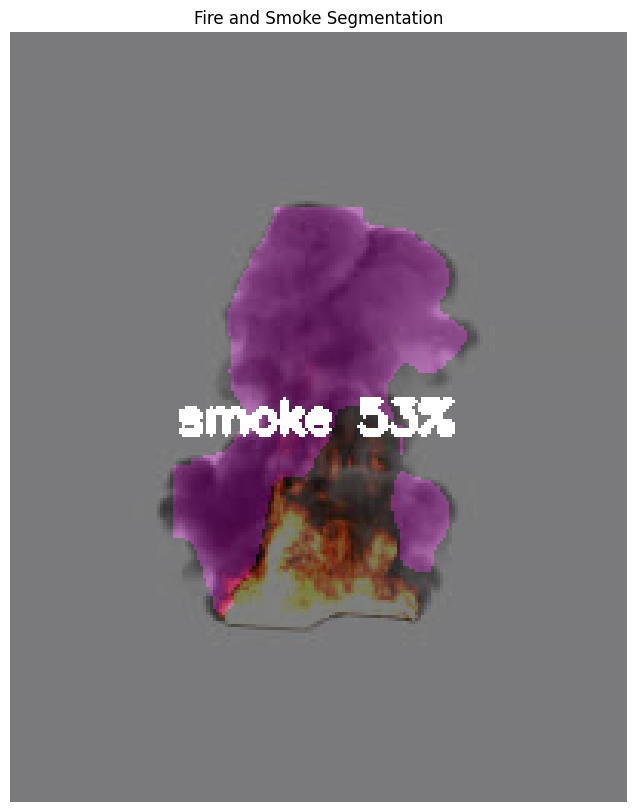

Prediction and visualization completed!


In [17]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch  # Import torch to handle GPU tensors

# 1. Load the trained YOLOv8-seg model
model = YOLO('runs/train/fire_smoke_seg/weights/best.pt')  # Replace with the path to your trained model

# 2. Define the path to the input image
image_path = '/content/f.jpg'  # Replace with the path to your input image

# 3. Load the original image to get its dimensions and preserve quality
orig_img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)  # Load with full quality
orig_h, orig_w = orig_img.shape[:2]

# 4. Make predictions on the input image, preserving original dimensions where possible
# Use the original image size for prediction if the model supports it, or handle resizing carefully
results = model.predict(
    source=image_path,
    conf=0.5,  # Confidence threshold (e.g., 50% or higher, as in your example with 80% and 84%)
    save=False,  # Don’t save the output image automatically; we’ll handle visualization
    verbose=False,
    imgsz=(max(orig_h, orig_w) // 32 * 32, max(orig_h, orig_w) // 32 * 32)  # Adjust image size to be divisible by 32, closest to original size
)

# 5. Process the results
for result in results:
    # Get the original image and segmentation data
    img = result.orig_img  # Original image (BGR format, possibly padded/resized)
    masks = result.masks.data  # Segmentation masks (PyTorch tensor, possibly on GPU)
    boxes = result.boxes  # Bounding boxes
    classes = result.boxes.cls  # Class IDs (0 for fire, 1 for smoke, based on your data.yaml)
    confidences = result.boxes.conf  # Confidence scores

    # Move masks to CPU and convert to NumPy
    if torch.cuda.is_available():
        masks = masks.cpu()  # Move to CPU if on GPU
    masks = masks.numpy()  # Convert to NumPy array

    # Resize masks to match the original image dimensions, preserving quality
    resized_masks = np.zeros((masks.shape[0], orig_h, orig_w), dtype=bool)
    for i, mask in enumerate(masks):
        # Resize each mask to the original image dimensions using high-quality interpolation
        resized_mask = cv2.resize(mask.astype(np.uint8), (orig_w, orig_h), interpolation=cv2.INTER_NEAREST)  # Use INTER_NEAREST for binary masks
        resized_masks[i] = resized_mask > 0  # Threshold to create a binary mask

    # Create a blank mask overlay for visualization with original image dimensions
    mask_overlay = np.zeros((orig_h, orig_w, 3), dtype=np.uint8)

    # Define colors for fire (yellow) and smoke (purple) in BGR format
    colors = [(0, 255, 255), (128, 0, 128)]  # BGR: Yellow for fire, Purple for smoke

    # Draw segmentation masks with custom colors
    for mask, cls, conf in zip(resized_masks, classes, confidences):
        color = colors[int(cls)]  # Select color based on class (0 = fire, 1 = smoke)
        mask_overlay[mask] = color  # Apply mask with the corresponding color

    # Blend the original image with the mask (e.g., 50% opacity for the mask)
    alpha = 0.5  # Transparency factor for the mask
    blended = cv2.addWeighted(orig_img, 1 - alpha, mask_overlay, alpha, 0.0)

    # Add confidence labels to the image (similar to your example)
    for box, cls, conf in zip(boxes.xyxy, classes, confidences):
        x1, y1, x2, y2 = box.int().tolist()  # Convert to integers for drawing
        label = f"{model.names[int(cls)]} {conf:.0%}"  # Format label (e.g., "fire 80%", "smoke 84%")

        # Draw label on the image (centered in the bounding box for simplicity)
        (text_w, text_h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)
        text_x = int((x1 + x2 - text_w) / 2)
        text_y = int((y1 + y2 + text_h) / 2)

        cv2.putText(blended, label, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # 6. Display the result using Matplotlib (similar to your uploaded image)
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(blended, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
    plt.axis('off')
    plt.title('Fire and Smoke Segmentation')
    plt.show()

    # Optional: Save the result with high quality (using PNG to avoid compression artifacts)
    cv2.imwrite('predicted_image.png', blended, [cv2.IMWRITE_PNG_COMPRESSION, 0])  # Save as PNG with no compression

print("Prediction and visualization completed!")